In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt   
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

def sum_day(srs):
    number = (wt_srs*srs/(wt_srs*srs.notna()).sum()).sum()
    return number

In [46]:
df = pd.read_csv(r'~/PycharmProjects/ane_django/parsed_content/filled.csv', index_col='id').drop(columns='level_0')
df.head(1)

,category_id,category_title,date,miss,price_old,site_code,site_link,site_title,site_unit,type,price_new,nsprice_f
id,,,,,,,,,,,,
0,10,"Молоко питьевое цельное пастеризованное 2,5-3,...",2019-02-05,0,-1.0,globus,https://online.globus.ru/products/moloko-36-ko...,"Молоко пастеризованное 36 Копеек 3,2%, 485 мл",за 1 шт.,food,34.89,34.89


In [47]:
df = df[df.category_id!=76]
# df = df[df.site_code!='ozon']
df.loc[:,'unq'] = df.category_id.astype(str) + df.site_link
df.loc[:,'date'] = pd.to_datetime(df.date)
df = df[df.miss==0]
df = df.drop(columns=['category_id','site_title','site_unit',
                      'site_link','price_new','miss','price_old','site_code'])
srs = df.groupby('unq')['nsprice_f'].transform(lambda x: x.pct_change()+1)
df.loc[:,'cng_price'] = srs
# df = df.drop(columns=['nsprice_f'])

pvt_df = df.pivot_table(index='date', columns='category_title', aggfunc=geo_mean).loc[:,'cng_price'].iloc[1:]
pvt_df.iloc[0,:] = 1

pvt_df = pvt_df.fillna(method='ffill').apply(lambda x: x.cumprod(), axis=0).dropna(how='all')

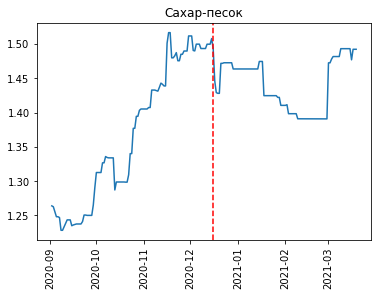

In [59]:
# Сахар-песок
date_range = (pvt_df.index > '2020-09-01')&(pvt_df.index < '2021-03-20')
plt.plot(pvt_df.loc[date_range, 'Сахар-песок']);
plt.axvline(x='2020-12-16', color='red', ls='--');
plt.title('Сахар-песок');
plt.xticks(rotation=90);

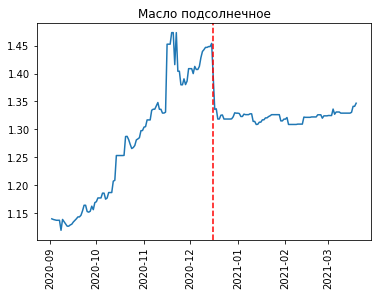

In [60]:
# Масло подсолнечное

date_range = (pvt_df.index > '2020-09-01')&(pvt_df.index < '2021-03-20')
plt.plot(pvt_df.loc[date_range, 'Масло подсолнечное']);
plt.axvline(x='2020-12-16', color='red', ls='--');
plt.title('Масло подсолнечное');
plt.xticks(rotation=90);

In [66]:
# export to excel
df_toexcel = pvt_df.loc[date_range, ['Сахар-песок','Масло подсолнечное']]
df_toexcel = (df_toexcel.pct_change()+1)
df_toexcel.iloc[0,:] = 1
df_toexcel = df_toexcel.cumprod()
df_toexcel.to_excel('dec2020_df.xlsx')